# Data Preprocessing and Exploration

This notebook handles the initial data loading, exploratory data analysis (EDA), and preparation of satellite imagery for the property valuation project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")

## Data Loading

Load the training and test datasets from CSV files.

In [3]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df  = pd.read_csv("../data/raw/test.csv")

print(train_df.shape)
print(test_df.shape)


(16209, 21)
(5404, 20)


## Initial Data Exploration

Examine the structure and basic statistics of the dataset.

In [7]:
train_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

## Price Distribution Analysis

Analyze the distribution of property prices and apply log transformation for better modeling.

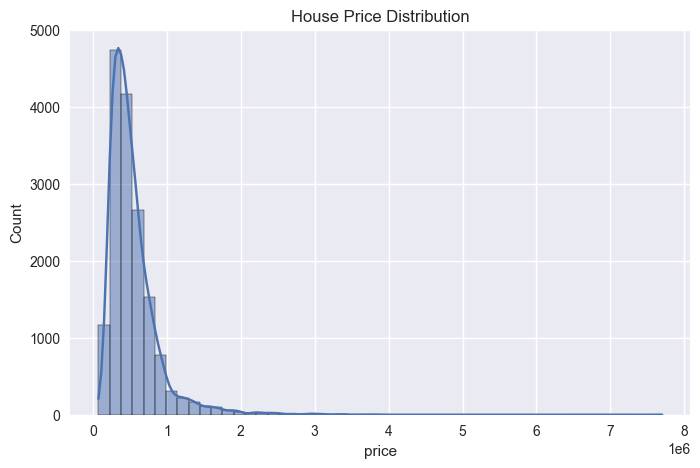

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()


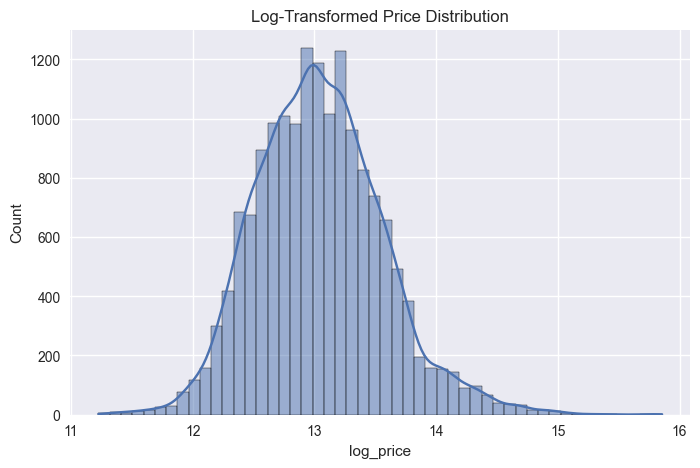

In [6]:
train_df["log_price"] = np.log1p(train_df["price"])

plt.figure(figsize=(8,5))
sns.histplot(train_df["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


## Geospatial Analysis

Visualize the geographical distribution of properties and their price variations.

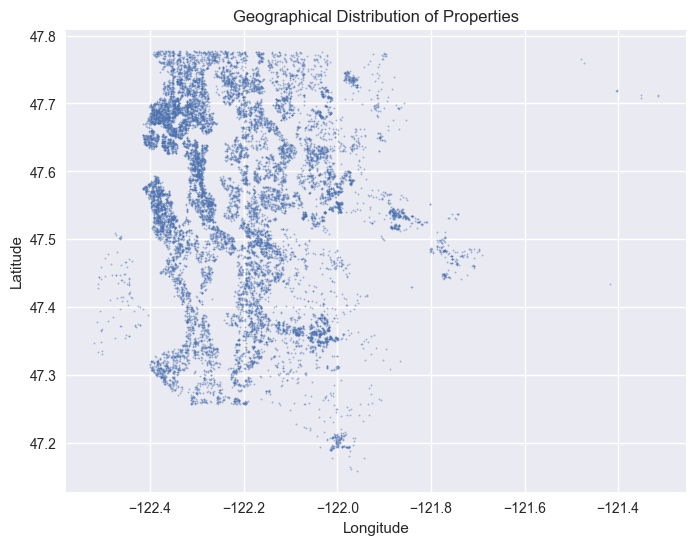

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    s=1,
    alpha=0.4
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Properties")
plt.show()


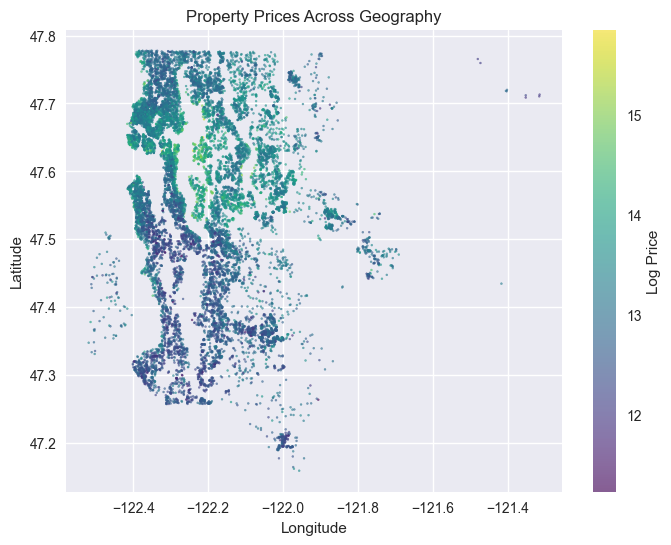

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["log_price"],
    cmap="viridis",
    s=2,
    alpha=0.6
)
plt.colorbar(label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Prices Across Geography")
plt.show()


### Geospatial Insights from Latitude–Longitude Analysis

- Property locations are highly clustered, indicating dense urban and suburban regions rather than uniform spatial distribution.
- Clear geographical patterns in pricing are visible when color-coded by log-transformed price.
- Northern and north-western latitude regions exhibit consistently higher property prices compared to southern regions.
- Price gradients align with known premium zones, suggesting proximity to desirable environmental features such as waterfronts, developed infrastructure, and low-density neighborhoods.
- These spatial price variations cannot be fully captured by latitude and longitude alone, motivating the use of satellite imagery to extract richer environmental context (e.g., greenery, road networks, water bodies).


## Satellite Image Acquisition

Download satellite imagery for each property using their geographical coordinates.

In [ ]:
from src.data_fetcher import download_images_fast

download_images_fast(
    df=train_df,
    output_dir="images/raw",
    workers=6,          # SAFE RANGE: 5–8
    max_images=None,    # FULL DATASET
    log_path="outputs/failed_image_ids.txt"
)
